In [109]:
#Basic Data Handling Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

#Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, PowerTransformer, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay,mean_squared_error

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline


In [27]:
# Link to dataset
dataset_link = "https://raw.githubusercontent.com/Afsaan/sensor_fault_detection/main/data/train.csv"

In [28]:
# Load dataset with "na" as NA values
df = pd.read_csv(dataset_link , na_values = "na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [29]:
# Display DataFrame shape
df.shape

(36188, 171)

In [30]:
 # Count occurrences of each class
df["class"].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [31]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [32]:
# Descriptive statistics of the Data
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.618800e+04,8292.000000,3.404700e+04,2.698800e+04,34601.000000,34601.000000,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,...,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,34458.000000,34459.000000
mean,6.591016e+04,0.711770,3.535223e+08,3.185447e+05,7.234300,11.606543,1.952347e+02,1.508277e+03,1.250718e+04,1.156928e+05,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,3.718051e+05,1.485117e+05,8.897664e+03,0.083464,0.209234
std,1.641238e+05,3.054033,7.926486e+08,5.225398e+07,186.437282,234.405353,1.852862e+04,4.371360e+04,1.801543e+05,8.853380e+05,...,1.254188e+06,5.948054e+05,1.251106e+06,1.331837e+06,1.220688e+06,1.722483e+06,5.153265e+05,5.316375e+04,3.789020,8.613915
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.660000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.190000e+03,2.732000e+03,3.680000e+03,5.660000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.102600e+04,0.000000,1.520000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.378500e+05,1.137840e+05,2.263560e+05,1.952480e+05,9.559400e+04,4.296600e+04,4.278000e+03,0.000000e+00,0.000000,0.000000
75%,5.006850e+04,0.000000,9.640000e+02,4.320000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.470120e+05,2.222860e+05,4.748680e+05,4.103280e+05,2.791920e+05,1.706080e+05,1.432300e+05,2.018000e+03,0.000000,0.000000
max,2.746564e+06,100.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.676929e+07,2.747758e+07,5.743524e+07,3.160781e+07,3.727856e+07,1.926740e+07,3.810078e+06,362.000000,1146.000000


In [33]:
# Identify numeric and categorical features
numeric_features = [features for features in df.columns if df[features].dtype != "object"]
categorical_features = [features for features in df.columns if df[features].dtype == "object"]
print(f"Number of Numerical Features - {len(numeric_features)}")
print(f"Number of Categorical Features - {len(categorical_features)}")

Number of Numerical Features - 170
Number of Categorical Features - 1


In [34]:
# Check for missing values
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [35]:
# Calculate percentage of missing values
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame(name = "Percentage_Missing").sort_values(by = 'Percentage_Missing' , ascending = 0)
missing

,Percentage_Missing
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


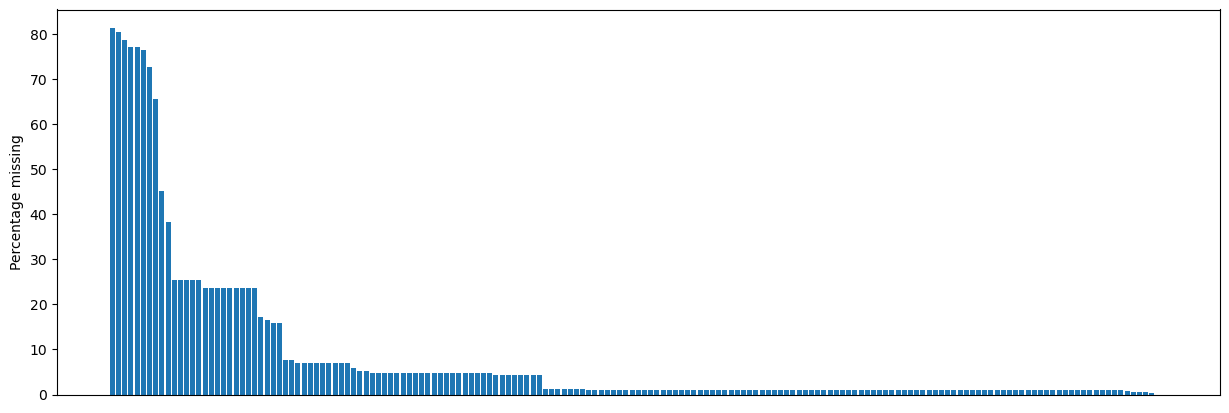

In [36]:
# Visualize missing value percentages
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [37]:
# Identify columns to drop due to high missing value percentages
drop = missing[missing["Percentage_Missing"] > 70]
drop

,Percentage_Missing
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [38]:
df.drop(list(drop.index),axis = 1,inplace = True)

In [39]:
df.shape

(36188, 164)

In [40]:
# Calculate total percentage of missing values
missing_value_count = df.isna().sum()
total_missing_value = missing_value_count.sum()
total_cells = np.product(df.shape)
total_percentage_missing = (total_missing_value/total_cells)*100
print(f'Total Percentage Of Missing Values = {total_percentage_missing.round(3)}%')

Total Percentage Of Missing Values = 5.371%


1000 35188


<Axes: xlabel='class', ylabel='count'>

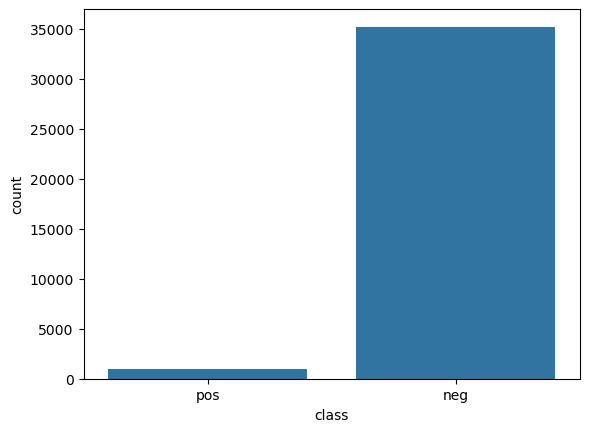

In [41]:
# Visualize target variable
pos = df[df["class"]=="pos"].shape[0]
neg = df[df["class"]=="neg"].shape[0]
print(pos, neg)
sns.countplot(data=df, x="class")

In [42]:
# Encode target variable
df = df.replace({"pos":1, "neg":0})
df['class'].unique()

array([1, 0], dtype=int64)

In [43]:
# Define machine learning models
models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [44]:
# Function to evaluate model performance
def evaluate_model(X, y, models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    cost_list = []
    model_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model
        
        # make prediction
        y_test_pred = model.predict(X_test)
        
        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)
        
        # calculate the cost
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")        
        print(f"- precision score: {pre}")        
        print(f"- Recall: {recall}")        
        print(f"- roc: {roc}")
        print(f"- total cost : {test_cost}")
        
        cost_list.append(test_cost)
        
        print("="*35)
        print("\n")
        
    report = pd.DataFrame(list(zip(model_list, cost_list)), 
                               columns=["Model Name", 'Cost']).sort_values(by=["Cost"])
                          
    return report

In [45]:
# Function to calculate evaluation metrics for classification models
def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)    
    pre = precision_score(true, predicted)    
    recall = recall_score(true, predicted)    
    roc = roc_auc_score(true, predicted)  
    
    return acc, f1, pre, recall, roc

# Function to calculate total cost based on confusion matrix
def total_cost(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost

### Trial 1 - knn imputer with robust scaling

In [47]:
# splitting the data 
x = df.drop('class', axis=1)
y = df['class']

In [48]:
# Initializeing RobustScaler for scaling features
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(x)

In [49]:
# Identify the best K value based on accuracy
results = []
neig_knn = [2,3]
for k in neig_knn:
    pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=k)),
                               ("model", LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2, n_jobs=-1)
    results.append(scores)
    print(f"n_neighbours = {k} || accuracy = {np.mean(scores)}")

n_neighbours = 2 || accuracy = 0.7287774953023102
n_neighbours = 3 || accuracy = 0.7357411296562396


In [50]:
# Pipline 
knn_pipeline = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=3)),
    ("Robust", RobustScaler())
])
knn_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('Robust', RobustScaler())])

In [51]:
# Apply the pipeline to the data
X_knn = knn_pipeline.fit_transform(x)

In [52]:
# Resample using SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_knn, y)

In [53]:
# Evaluate the model 
report_knn = evaluate_model(X_res, y_res, models)
report_knn

Random forest
Model performance for test Set
- Accuracy: 0.9915169660678643
- f1 score: 0.991579990094106
- precision score: 0.9881539980256664
- Recall: 0.9950298210735586
- roc: 0.9915028864886831
- total cost : 18340


Decision tree
Model performance for test Set
- Accuracy: 0.9856715141146278
- f1 score: 0.9857779664614732
- precision score: 0.9823720208715273
- Recall: 0.989207611474013
- roc: 0.9856573413797206
- total cost : 39250


logisitic Regression
Model performance for test Set
- Accuracy: 0.5842600513259196
- f1 score: 0.6920477347132749
- precision score: 0.550857431069267
- Recall: 0.9305595001420051
- roc: 0.5828720775831697
- total cost : 297930


knn classifier
Model performance for test Set
- Accuracy: 0.9756201881950385
- f1 score: 0.975986518747367
- precision score: 0.9652777777777778
- Recall: 0.9869355296790685
- roc: 0.9755748361249623
- total cost : 48500


xgb
Model performance for test Set
- Accuracy: 0.9954376960364985
- f1 score: 0.9954667799971667
- prec

,Model Name,Cost
4,xgb,7990
0,Random forest,18340
1,Decision tree,39250
3,knn classifier,48500
2,logisitic Regression,297930


### Trail 2 - Simple imputer(Median) and robust scaling

In [55]:
# Pipline 
med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])

In [56]:
X_med = med_pipeline.fit_transform(x)

In [59]:
# Resample using SMOTETomek
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

In [60]:
report_med = evaluate_model(X_res, y_res, models)
report_med

Random forest
Model performance for test Set
- Accuracy: 0.9920091324200914
- f1 score: 0.9920993227990971
- precision score: 0.987779182469448
- Recall: 0.9964574181663597
- roc: 0.9919778109656342
- total cost : 13370


Decision tree
Model performance for test Set
- Accuracy: 0.9867294520547946
- f1 score: 0.986892177589852
- precision score: 0.9816346558250385
- Recall: 0.9922063199659912
- roc: 0.9866908881048522
- total cost : 28810


logisitic Regression
Model performance for test Set
- Accuracy: 0.622431506849315
- f1 score: 0.7094223588842521
- precision score: 0.5791125056028686
- Recall: 0.9154031458126682
- roc: 0.6203686227698202
- total cost : 345450


knn classifier
Model performance for test Set
- Accuracy: 0.970105593607306
- f1 score: 0.9706438730470118
- precision score: 0.959950110864745
- Recall: 0.9815785744650701
- roc: 0.9700248095776995
- total cost : 67890


xgb
Model performance for test Set
- Accuracy: 0.9965753424657534
- f1 score: 0.9966096906342704
- preci

,Model Name,Cost
4,xgb,1460
0,Random forest,13370
1,Decision tree,28810
3,knn classifier,67890
2,logisitic Regression,345450


### Trial 3 - Simple imputer (Mean) and robust scaling

In [62]:
mean_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("Robust", RobustScaler())
])

In [63]:
X_mean = mean_pipeline.fit_transform(x)

In [64]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_mean, y)

In [65]:
report_mean = evaluate_model(X_res, y_res, models)
report_mean

Random forest
Model performance for test Set
- Accuracy: 0.9920912005700036
- f1 score: 0.992141592920354
- precision score: 0.9866234863418756
- Recall: 0.9977217713227965
- roc: 0.9920867841211816
- total cost : 8950


Decision tree
Model performance for test Set
- Accuracy: 0.9851799073744211
- f1 score: 0.9852628595720561
- precision score: 0.9805387110421662
- Recall: 0.9900327495372347
- roc: 0.9851761009523025
- total cost : 36380


logisitic Regression
Model performance for test Set
- Accuracy: 0.6698254364089775
- f1 score: 0.7355928335045075
- precision score: 0.6137294106445778
- Recall: 0.9178413783283497
- roc: 0.6696309002309175
- total cost : 329070


knn classifier
Model performance for test Set
- Accuracy: 0.9727823298895618
- f1 score: 0.9731892195395845
- precision score: 0.9595847750865052
- Recall: 0.9871849636907305
- roc: 0.9727710329006988
- total cost : 47920


xgb
Model performance for test Set
- Accuracy: 0.9960099750623441
- f1 score: 0.9960244214113304
- pr

,Model Name,Cost
4,xgb,4480
0,Random forest,8950
1,Decision tree,36380
3,knn classifier,47920
2,logisitic Regression,329070


# Trial 4 - PCA with imputing median

In [67]:
pca_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])

In [68]:
x_pca = pca_pipeline.fit_transform(x)

In [69]:
# Calculate explained variance for PCA
var_ratio = {}
for n in range(2,150):
    pc = PCA(n_components=n)
    df_pca = pc.fit(x_pca)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<Axes: >

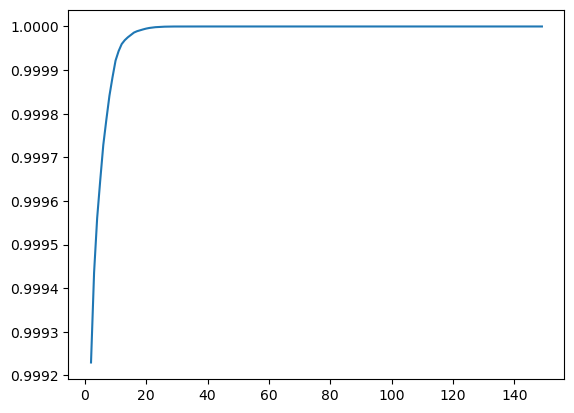

In [70]:
pd.Series(var_ratio).plot()

In [72]:
!pip install kneed

In [74]:
from kneed import KneeLocator

In [75]:
# Find the optimal number of components using KneeLocator
i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio) 

<Figure size 500x500 with 0 Axes>

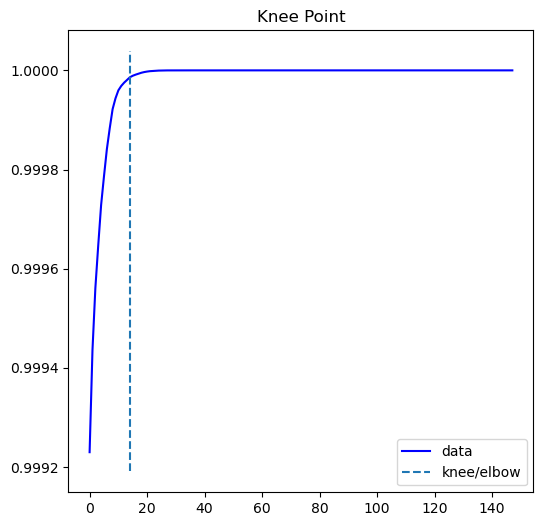

In [76]:
# Visualize the knee point
fig = plt.figure(figsize=(5,5))
knee.plot_knee()

In [83]:
pca_final = PCA(n_components=18).fit(x_pca)
reduced = pca_final.fit_transform(x_pca)

In [84]:
# Resample using SMOTETomek
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(reduced, y)

In [85]:
# Evaluate the model
report_pca = evaluate_model(X_res, y_res, models)
report_pca

Random forest
Model performance for test Set
- Accuracy: 0.9835160897298072
- f1 score: 0.9836601307189542
- precision score: 0.9782393669634025
- Recall: 0.9891413059008429
- roc: 0.9834978890735161
- total cost : 39540


Decision tree
Model performance for test Set
- Accuracy: 0.9752741345947108
- f1 score: 0.9754710273729115
- precision score: 0.9708463062553071
- Recall: 0.9801400200028576
- roc: 0.9752583907894644
- total cost : 71560


logisitic Regression
Model performance for test Set
- Accuracy: 0.8773740414247831
- f1 score: 0.8688788412905204
- precision score: 0.9370247933884297
- Recall: 0.8099728532647521
- roc: 0.8775921211966555
- total cost : 668810


knn classifier
Model performance for test Set
- Accuracy: 0.9630187056546979
- f1 score: 0.9634716126291943
- precision score: 0.9548196997334082
- Recall: 0.9722817545363623
- roc: 0.9629887346164699
- total cost : 100220


xgb
Model performance for test Set
- Accuracy: 0.977280871497169
- f1 score: 0.9774585792505155
- 

,Model Name,Cost
0,Random forest,39540
4,xgb,64910
1,Decision tree,71560
3,knn classifier,100220
2,logisitic Regression,668810


In [89]:
!pip install prettytable

In [91]:
# Summary Table of Results
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names=["Model", "Imputation_method", "Cost"]
pt.add_row(['xgb', "knn-imputer", "7990"])
pt.add_row(['xgb', "median", "1460"]) # winner
pt.add_row(['xgb', "mean", "4480"])
pt.add_row(['Random foresT', "PCA", "54870"])
print(pt)

+---------------+-------------------+-------+
|     Model     | Imputation_method |  Cost |
+---------------+-------------------+-------+
|      xgb      |    knn-imputer    |  7990 |
|      xgb      |       median      |  1460 |
|      xgb      |        mean       |  4480 |
| Random foresT |        PCA        | 54870 |
+---------------+-------------------+-------+


#### Final Model and Report

In [93]:
# Final Model and Report
final_model = XGBClassifier()

# Prepare data with median imputation for final model training
med_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("Robust", RobustScaler())
])
X_med = med_pipeline.fit_transform(x)


In [94]:
# Resample using SMOTETomek for final model training
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_med, y)

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [96]:
# Fit the final model
final_model = final_model.fit(X_train, y_train)

In [97]:
# Make predictions
y_pred = final_model.predict(X_test)

In [98]:
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      6959
           1       0.99      1.00      1.00      7057

    accuracy                           1.00     14016
   macro avg       1.00      1.00      1.00     14016
weighted avg       1.00      1.00      1.00     14016



In [99]:
# Evaluate final model's accuracy
accuracy_score(y_pred, y_test)

0.9965753424657534

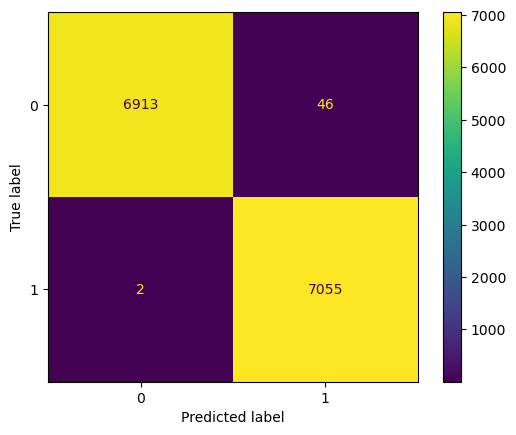

In [121]:
# Plot confusion matrix for final model

ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test)